In [80]:
import numpy as np                                                                        
import matplotlib.pyplot as plt
import pyCloudy as pc
import pyneb as pn
from astropy    import constants as const
from astropy.io import ascii
import pandas as pd

# from scipy.integrate import simps
from numpy import log10, exp

kpc = const.kpc.cgs.value

path = r'/home/jin/CIV_Photoionization/Lumin_41/CIV_Lumin_41'
Mod = pc.CloudyModel(path)
Mod.print_lines()
A = Mod.n_ions
#print(A)
Mod.ionic_names
Lum_Lya = float(Mod.get_emis_vol('H__1_121567A'))
Lum_He2 = float(Mod.get_emis_vol('HE_2_164043A'))
Lum_O6 = float(Mod.get_emis_vol('O__6_103191A')) + float(Mod.get_emis_vol('O__6_103762A'))
Lum_C4 = float(Mod.get_emis_vol('C__4_154819A')) + float(Mod.get_emis_vol('C__4_155078A'))
Lum_N5 = float(Mod.get_emis_vol('N__5_123882A')) + float(Mod.get_emis_vol('N__5_124280A'))
Lum_Mg2 = float(Mod.get_emis_vol('MG_2_279553A'))+ float(Mod.get_emis_vol('MG_2_280271A'))




#print(np.sum(Mod.dr*Mod.nH))

N_H = sum(Mod.dr*Mod.nH)
frac_He = 1.0E-01
frac_C = 2.45E-04
frac_O = 4.90E-04
frac_N = 8.51E-05
frac_Mg = 3.47E-05

N_HI = sum(Mod.dr*Mod.nH*Mod.get_ionic('H',0))
N_HII = sum(Mod.dr*Mod.nH*Mod.get_ionic('H',1))
N_HeII = frac_He*sum(Mod.dr*Mod.nH*Mod.get_ionic('He',1))
N_OVI = frac_O*sum(Mod.dr*Mod.nH*Mod.get_ionic('O',5))
N_NV = frac_N*sum(Mod.dr*Mod.nH*Mod.get_ionic('N',4))
N_CIV = frac_C*sum(Mod.dr*Mod.nH*Mod.get_ionic('C',3))

f = open('/home/jin/CIV_Photoionization/Lumin_41/CIV_Lumin_41.ele_Mg','r')
header = f.readline()
frac_Mg_II = np.zeros(len(Mod.nH))
# print(len(f[0]))
i = 0
for line in f:
    line = line.strip()
    columns = line.split()
    j = float(columns[2])
    frac_Mg_II[i] = j
    i = i + 1
N_MgII = frac_Mg*sum(Mod.dr*Mod.nH*frac_Mg_II)

print('N_H', N_H)
print('Lya',Lum_Lya, N_HI)
print('He II',Lum_He2, N_HeII)
print('O VI',Lum_O6, N_OVI)
print('C IV',Lum_C4, N_CIV)
print('N V',Lum_N5, N_NV)
print('Mg II',Lum_Mg2, N_MgII)




H__1_121567A 4.419502e+40
H__1_102572A 2.116070e+37
H__1_486133A 1.483200e+39
H__1_656281A 4.222999e+39
O__6_103191A 1.054517e+37
O__6_103762A 8.730197e+36
HE_2_972108A 4.415405e+37
HE_2_102527A 1.078724e+38
HE_2_164043A 1.267613e+39
C__4_155078A 7.472727e+37
O__3_500684A 6.881102e+39
N__5_123882A 1.772319e+37
N__5_124280A 1.349395e+37
C__4_154819A 1.356512e+38
C__4_155078A_1 7.472727e+37
MG_2_279553A 6.522748e+38
MG_2_280271A 3.396399e+38
N_H 2.47523796611e+21
Lya 4.419501528338886e+40 2.1773454713801873e+21
He II 1.2676134710628618e+39 2.0000549601984844e+19
O VI 1.9275370203981729e+37 2078820165026711.5
C IV 2.1037844173629473e+38 1.1181034161775738e+16
N V 3.1217140791317756e+37 1511128923438725.8
Mg II 9.919146612873462e+38 7.323109563010952e+16


H I 4.419501528338886e+40 2.1773454713801873e+21
O VI 1.9275370203981729e+37 2078820165026711.5
C IV 2.1037844173629473e+38 1.1181034161775738e+16
N V 3.1217140791317756e+37 1511128923438725.8
Mg II 9.919146612873462e+38 7.323109563010952e+16


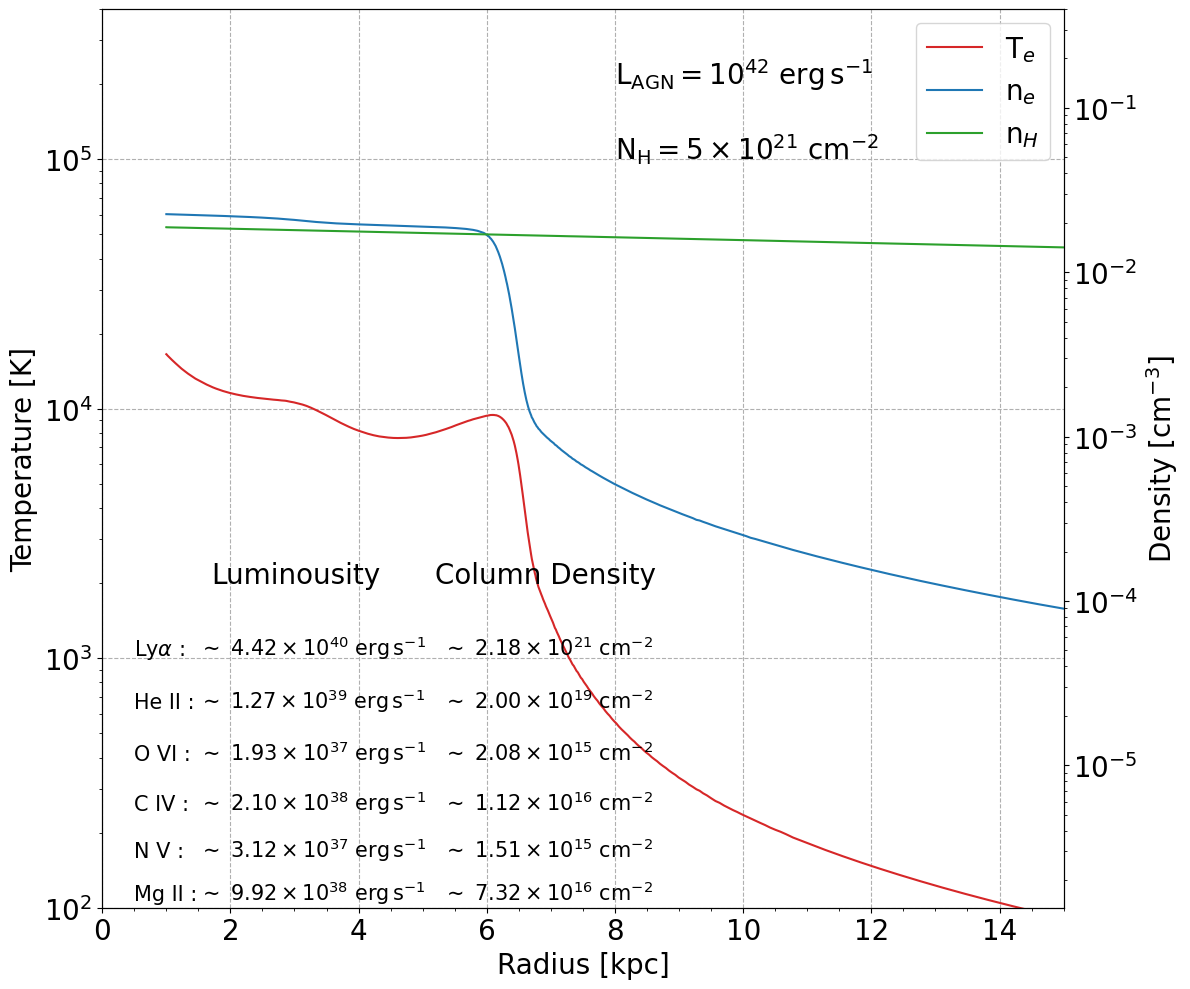

In [81]:
fig, ax1 = plt.subplots(figsize=(12, 10))

# 온도 플롯 (왼쪽 y축)
color = 'tab:red'
ax1.set_xlabel('Radius [kpc]', fontsize=20)
ax1.set_ylabel('Temperature [K]', fontsize=20)
ax1.plot(Mod.radius/kpc, Mod.te, color=color, label=r'T$_{e}$')
ax1.tick_params(axis='y', labelsize=20)
ax1.tick_params(axis='x', labelsize=20)
ax1.minorticks_on()
ax1.set_xlim(0,15)
ax1.set_yscale('log')
plt.legend(fontsize=20)

# 밀도 플롯을 위한 두 번째 y축 생성
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Density [cm$^{-3}$]', fontsize=20)
ax2.plot(Mod.radius/kpc, Mod.ne, color=color, label=r'n$_{e}$')
color = 'tab:green'
ax2.plot(Mod.radius/kpc, Mod.nH, color=color, label=r'n$_{H}$')
ax2.tick_params(axis='y', labelsize=20)
ax2.set_xlim(0,15)
ax2.set_yscale('log')

# 레이아웃 조정
fig.tight_layout()
plt.legend()

# ax1과 ax2의 레전드 합치기
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right', fontsize=20)

# ax2의 레전드 제거
ax2.get_legend().remove()
ax1.set_ylim(top=4e5,bottom=100)
ax2.set_ylim(top=0.4)
ax1.grid(True,linestyle='--')
print('H I',Lum_Lya, N_HI)
print('O VI',Lum_O6, N_OVI)
print('C IV',Lum_C4, N_CIV)
print('N V',Lum_N5, N_NV)
print('Mg II',Lum_Mg2, N_MgII)

def format_scientific(number):
    exponent = int(np.log10(number))
    mantissa = number / 10**exponent
    return f'{mantissa:.2f} \\times 10^{{{exponent}}}'

# 로그 스케일에서 균일한 간격을 위한 y 좌표 계산
y_base = 2e3
y_factor = 0.6  # 간격 조절을 위한 인자
y_coords = [y_base * y_factor**i for i in range(6)]

ax1.text(8, 2e5, r'$\rm L_{\rm AGN} = 10^{42} ~ \rm erg \, \rm s^{-1}$', fontsize=20)
ax1.text(8, 1e5, r'$\rm N_{H} = 5 \times 10^{21} ~ \rm cm^{-2}$', fontsize=20)

di = 2
ax1.text(1.7, y_coords[0] , r'Luminousity', fontsize=20)
ax1.text(5.2, y_coords[0] , r'Column Density', fontsize=20)

labels = ['Ly$\\alpha$','He II','O VI', 'C IV', 'N V', 'Mg II']
luminosities = [Lum_Lya,Lum_He2,Lum_O6, Lum_C4, Lum_N5, Lum_Mg2]
column_densities = [N_HI,N_HeII,N_OVI, N_CIV, N_NV, N_MgII]

for i, (label, lum, col_den) in enumerate(zip(labels, luminosities, column_densities)):
    ax1.text(0.5, y_coords[i]/di+30, f'{label} :', fontsize=15)
    ax1.text(1.5, y_coords[i]/di+30 , r'$\sim ~ {} ~ \rm erg \, \rm s^{{-1}}$'.format(format_scientific(lum)), fontsize=15)
    ax1.text(5.3, y_coords[i]/di+30, r'$\sim ~ {} ~ \rm cm^{{-2}}$'.format(format_scientific(col_den)), fontsize=15)


In [82]:
nun = len(Mod.nH)
f = open('/home/jin/CIV_Photoionization/Lumin_41/CIV_Lumin_41.ele_He','r')
header = f.readline()
HeII_frac = np.zeros(nun)
# print(len(f[0]))
i = 0
for line in f:
    line = line.strip()
    columns = line.split()
    j = float(columns[2])
    HeII_frac[i] = j
    i = i + 1

f = open('/home/jin/CIV_Photoionization/Lumin_41/CIV_Lumin_41.ele_C','r')
header = f.readline()
CIV_frac = np.zeros(nun)
# print(len(f[0]))
i = 0
for line in f:
    line = line.strip()
    columns = line.split()
    j = float(columns[4])
    CIV_frac[i] = j
    i = i + 1

f = open('/home/jin/CIV_Photoionization/Lumin_41/CIV_Lumin_41.ele_H','r')
header = f.readline()
HI_frac = np.zeros(nun)
# print(len(f[0]))
i = 0
for line in f:
    line = line.strip()
    columns = line.split()
    j = float(columns[1])
    HI_frac[i] = j
    i = i + 1

f = open('/home/jin/CIV_Photoionization/Lumin_41/CIV_Lumin_41.ele_Mg','r')
header = f.readline()
MgII_frac = np.zeros(nun)
# print(len(f[0]))
i = 0
for line in f:
    line = line.strip()
    columns = line.split()
    j = float(columns[2])
    MgII_frac[i] = j
    i = i + 1

f = open('/home/jin/CIV_Photoionization/Lumin_41/CIV_Lumin_41.ele_O','r')
header = f.readline()
OVI_frac = np.zeros(nun)
# print(len(f[0]))
i = 0
for line in f:
    line = line.strip()
    columns = line.split()
    j = float(columns[6])
    OVI_frac[i] = j
    i = i + 1

f = open('/home/jin/CIV_Photoionization/Lumin_41/CIV_Lumin_41.ele_N','r')
header = f.readline()
NV_frac = np.zeros(nun)
# print(len(f[0]))
i = 0
for line in f:
    line = line.strip()
    columns = line.split()
    j = float(columns[5])
    NV_frac[i] = j
    i = i + 1

R = Mod.radius/kpc

In [83]:
HeII_frac

array([2.63e-02, 2.64e-02, 2.72e-02, 2.90e-02, 3.12e-02, 3.31e-02,
       3.48e-02, 3.67e-02, 3.89e-02, 4.10e-02, 4.33e-02, 4.60e-02,
       4.85e-02, 5.13e-02, 5.46e-02, 5.77e-02, 6.12e-02, 6.52e-02,
       6.90e-02, 7.36e-02, 7.88e-02, 8.37e-02, 8.94e-02, 9.60e-02,
       1.03e-01, 1.09e-01, 1.16e-01, 1.24e-01, 1.32e-01, 1.42e-01,
       1.53e-01, 1.64e-01, 1.77e-01, 1.92e-01, 2.08e-01, 2.26e-01,
       2.48e-01, 2.70e-01, 2.96e-01, 3.27e-01, 3.58e-01, 3.77e-01,
       3.87e-01, 4.01e-01, 4.19e-01, 4.44e-01, 4.77e-01, 5.22e-01,
       5.72e-01, 6.16e-01, 6.62e-01, 7.18e-01, 7.65e-01, 7.94e-01,
       8.15e-01, 8.35e-01, 8.59e-01, 8.78e-01, 8.92e-01, 9.05e-01,
       9.19e-01, 9.30e-01, 9.37e-01, 9.43e-01, 9.51e-01, 9.56e-01,
       9.59e-01, 9.63e-01, 9.65e-01, 9.68e-01, 9.69e-01, 9.71e-01,
       9.72e-01, 9.73e-01, 9.74e-01, 9.74e-01, 9.75e-01, 9.75e-01,
       9.75e-01, 9.76e-01, 9.76e-01, 9.75e-01, 9.75e-01, 9.75e-01,
       9.75e-01, 9.74e-01, 9.74e-01, 9.74e-01, 9.73e-01, 9.72e

/tmp/ipykernel_1038/1600373543.py:11: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(10e-8,0)


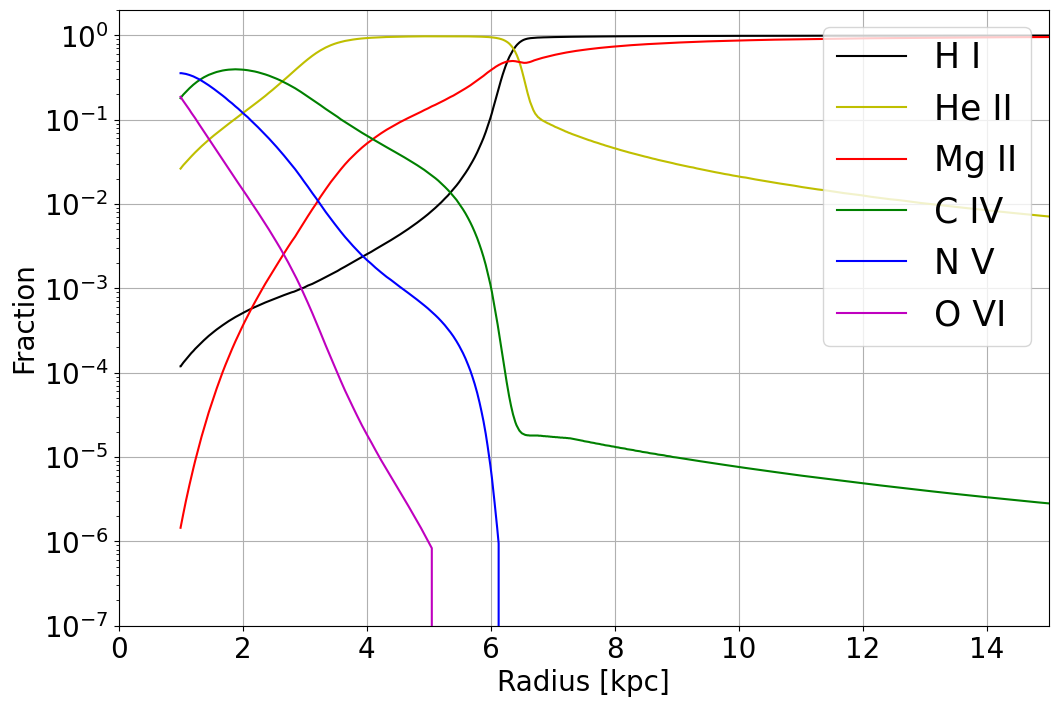

In [84]:
fig = plt.figure(1,figsize=(12, 8))
plt.plot(R,HI_frac,'k',label='H I')
plt.plot(R,HeII_frac,'y',label='He II')
plt.plot(R,MgII_frac,'r',label='Mg II')
plt.plot(R,CIV_frac,'g',label='C IV')
plt.plot(R,NV_frac,'b',label='N V')
plt.plot(R,OVI_frac,'m',label='O VI')

plt.yscale('log')
plt.xlim(0,15)
plt.ylim(10e-8,0)
plt.xlabel('Radius [kpc]', fontsize=20)
plt.ylabel('Fraction', fontsize=20)
# ax1.plot(Mod.radius/kpc, Mod.te, color=color, label=r'T$_{e}$')
plt.tick_params(axis='y', labelsize=20)
plt.tick_params(axis='x', labelsize=20)
plt.grid(True)
plt.legend(loc='upper right',fontsize=25)

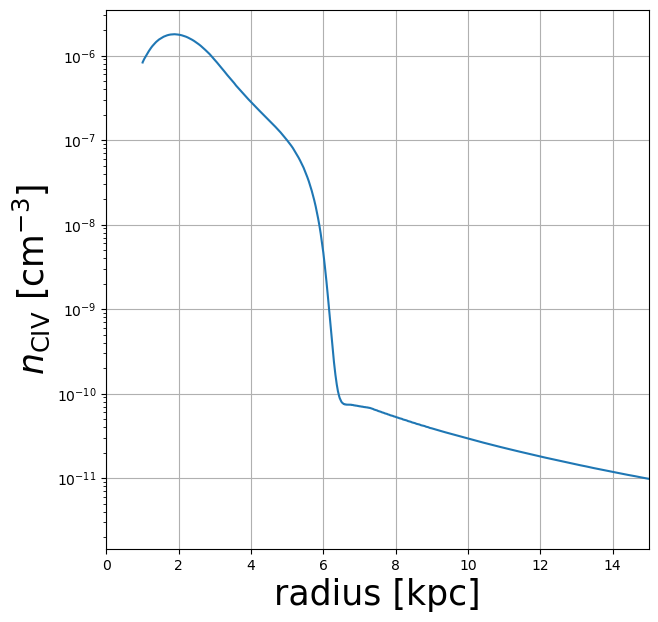

In [85]:
fig = plt.figure(1,figsize=(7,7))
n_H= Mod.nH
n_C = n_H*frac_C
nden_CIV = CIV_frac*n_C
plt.plot(R,nden_CIV)
plt.xlim(0,15)
plt.grid(True)
plt.xlabel('radius [kpc]',fontsize=25)
plt.ylabel(r'$n_{\rm CIV}~[\rm cm^{-3}]$',fontsize=25)
plt.yscale('log')

In [86]:
import numpy as np

CIV_1548_emis = Mod.get_emis('C__4_154819A')
CIV_1551_emis = Mod.get_emis('C__4_155078A')
ratio = CIV_1548_emis / CIV_1551_emis

ratio_t = np.array([])
radius_t = np.array([])
for ii,ra in enumerate (ratio):
    # Check if the value is NaN using np.isnan()
    if np.isnan(ii):
        print('hi')
    else:
        # Append the value to ratio_t correctly
        ratio_t = np.append(ratio_t, ra)
        radius_t = np.append(radius_t, R[ii])


/tmp/ipykernel_1038/4147166784.py:5: RuntimeWarning: invalid value encountered in divide
  ratio = CIV_1548_emis / CIV_1551_emis


(0.0, 15.0)

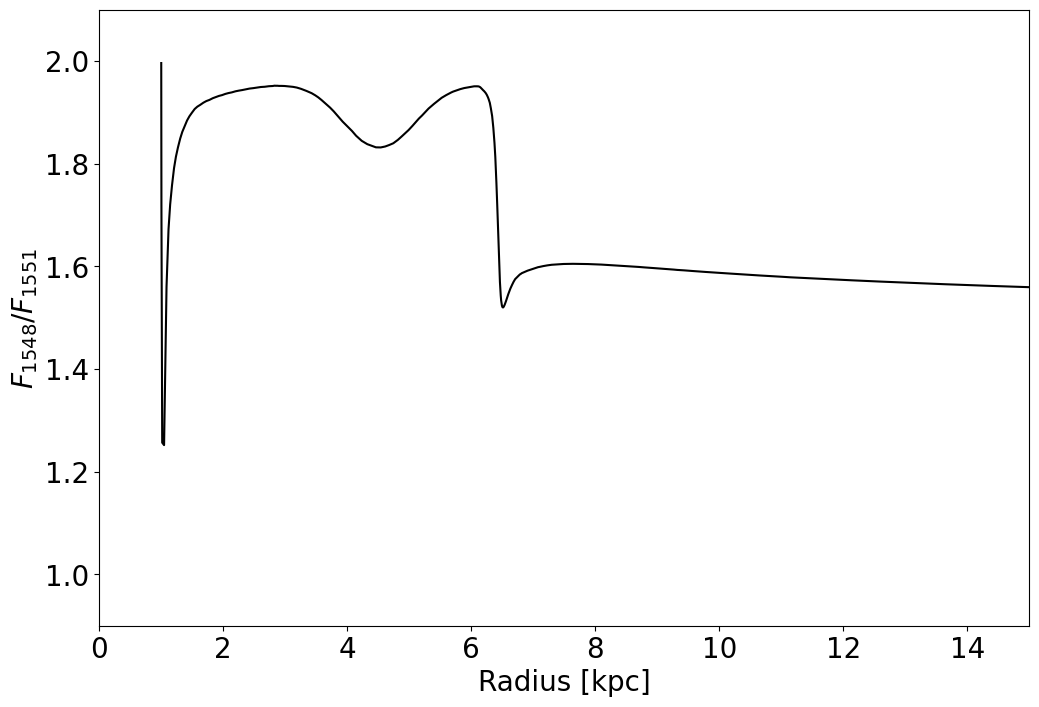

In [87]:
fig = plt.figure(1,figsize=(12, 8))
# (Mod.get_emis('C__4_154819A')) + (Mod.get_emis('C__4_155078A'))
plt.plot(radius_t, ratio_t ,'k')
# plt.legend(fontsize=20)

plt.xlabel('Radius [kpc]', fontsize=20)
plt.ylabel(r'$F_{1548} /F_{1551}$', fontsize=20)
# ax1.plot(Mod.radius/kpc, Mod.te, color=color, label=r'T$_{e}$')
plt.yticks([1.0,1.2,1.4,1.6,1.8,2.0])
plt.ylim(0.9,2.1)
plt.tick_params(axis='y', labelsize=20)
plt.tick_params(axis='x', labelsize=20)
plt.xlim(0,15)

In [88]:
HI_emis = Mod.get_emis('H__1_121567A')
HeII_emis = Mod.get_emis('HE_2_164043A')
MgII_emis = (Mod.get_emis('MG_2_279553A'))+ (Mod.get_emis('MG_2_280271A'))
OVI_emis = (Mod.get_emis('O__6_103191A')) +(Mod.get_emis('O__6_103762A'))
CIV_emis = (Mod.get_emis('C__4_154819A')) + (Mod.get_emis('C__4_155078A'))
NV_emis = (Mod.get_emis('N__5_123882A')) + (Mod.get_emis('N__5_124280A'))

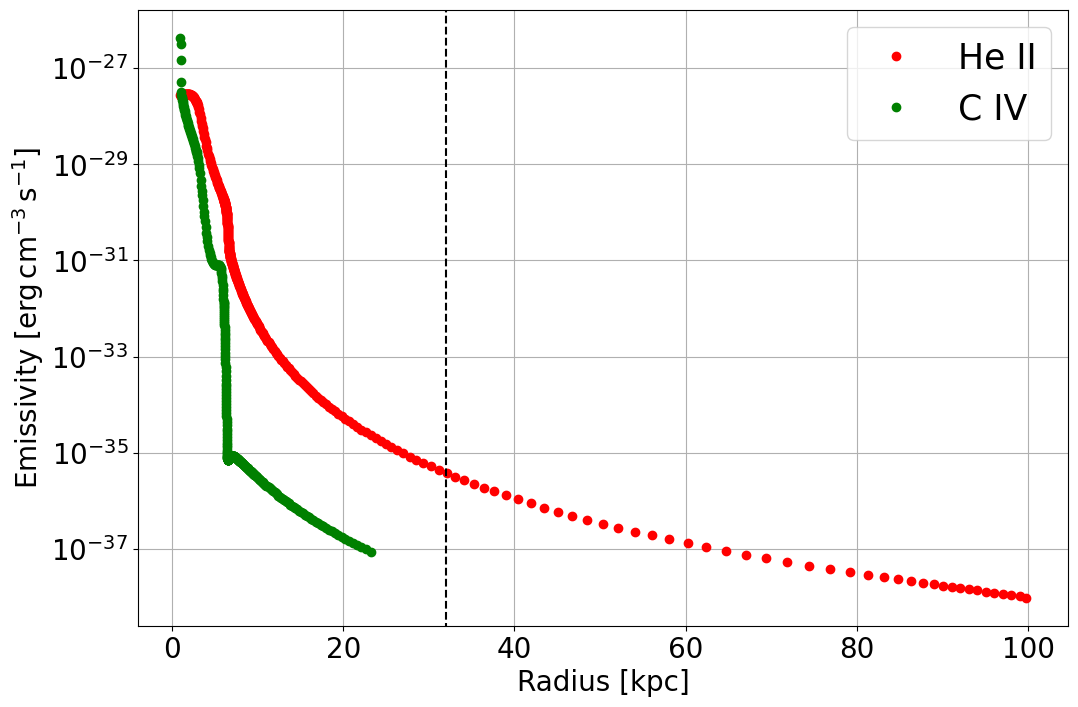

In [89]:
fig = plt.figure(1,figsize=(12, 8))
# plt.plot(R,HI_emis,'k',label='H I')
plt.plot(R,HeII_emis,'ro',label='He II')
plt.plot(R,CIV_emis,'go',label='C IV')
# plt.plot(R,NV_emis,'b',label='N V')
# plt.plot(R,OVI_emis,'m',label='O VI')

plt.yscale('log')
x_max = R[np.where(CIV_emis==0)[0].min()]
plt.axvline(x=32,ymin=-1,ymax=1,linestyle='--',color='k')
# plt.xlim(0,33)
plt.xlabel('Radius [kpc]', fontsize=20)
plt.ylabel(r'Emissivity [$\rm erg\,cm^{-3}\,s^{-1}$]', fontsize=20)
# ax1.plot(Mod.radius/kpc, Mod.te, color=color, label=r'T$_{e}$')
plt.tick_params(axis='y', labelsize=20)
plt.tick_params(axis='x', labelsize=20)
plt.grid(True)
plt.legend(loc='upper right',fontsize=25)

name= ['Radius_kpc','Emissivity']
tt = pd.DataFrame(np.column_stack((R,CIV_emis)),columns=name)
tt.to_csv('/home/jin/바탕화면/CIV_emissivity.txt', sep='\t', index=False)


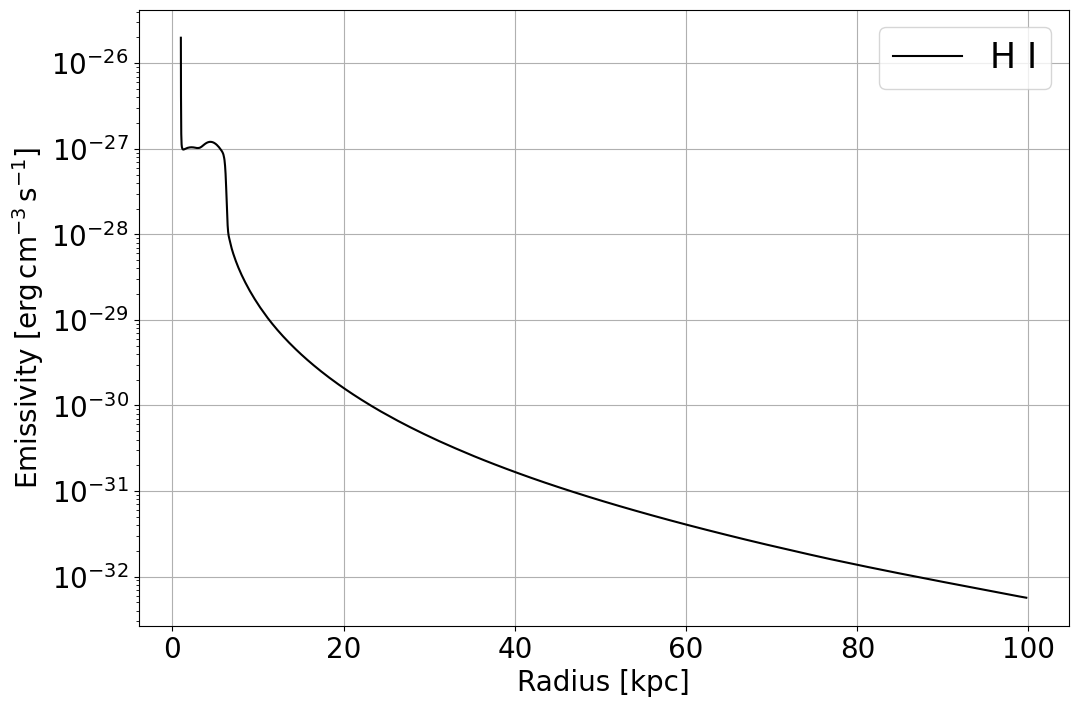

In [90]:
fig = plt.figure(1,figsize=(12, 8))
plt.plot(R,HI_emis,'k',label='H I')
# plt.plot(R,MgII_emis,'r',label='Mg II')
# plt.plot(R,CIV_emis,'go',label='C IV')
# plt.plot(R,NV_emis,'b',label='N V')
# plt.plot(R,OVI_emis,'m',label='O VI')

plt.yscale('log')
# x_max = R[np.where(CIV_emis==0)[0].min()]
# plt.axvline(x=32,ymin=-1,ymax=1,linestyle='--',color='k')
# plt.xlim(0,33)
plt.xlabel('Radius [kpc]', fontsize=20)
plt.ylabel(r'Emissivity [$\rm erg\,cm^{-3}\,s^{-1}$]', fontsize=20)
# ax1.plot(Mod.radius/kpc, Mod.te, color=color, label=r'T$_{e}$')
plt.tick_params(axis='y', labelsize=20)
plt.tick_params(axis='x', labelsize=20)
plt.grid(True)
plt.legend(loc='upper right',fontsize=25)


In [91]:
x = R[np.where(CIV_emis==0)[0].min()]
x

23.781875475315374

In [92]:
tt = pd.DataFrame(np.column_stack((R, CIV_emis)), columns=['Radius_kpc', 'Emissivity'])

print(tt)


     Radius_kpc    Emissivity
0      1.000617  4.317100e-27
1      1.003708  3.136700e-27
2      1.016078  1.480980e-27
3      1.046490  5.133700e-28
4      1.085755  3.250000e-28
..          ...           ...
418   96.027531  0.000000e+00
419   97.017589  0.000000e+00
420   98.007323  0.000000e+00
421   98.997381  0.000000e+00
422   99.746325  0.000000e+00

[423 rows x 2 columns]


/tmp/ipykernel_1038/766947627.py:92: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


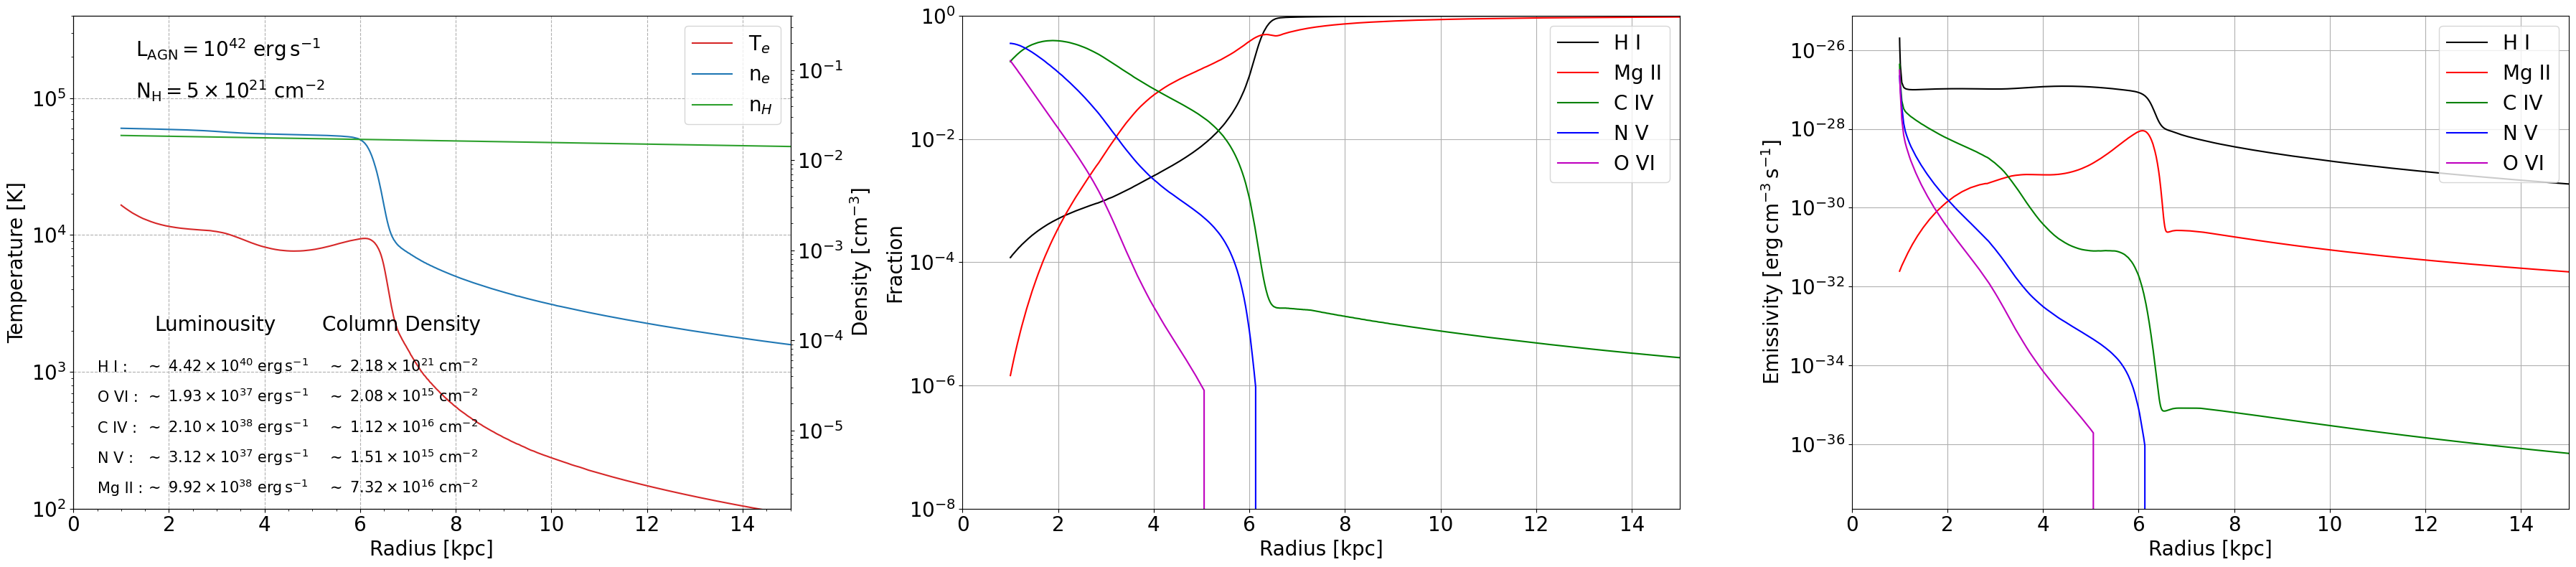

In [93]:
# 필요한 라이브러리 import (이미 되어 있다고 가정)

# 데이터 준비 (이미 되어 있다고 가정)

# 그래프 그리기
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(36, 8))

# 첫 번째 subplot (온도와 밀도)
color = 'tab:red'
ax1.set_xlabel('Radius [kpc]', fontsize=20)
ax1.set_ylabel('Temperature [K]', fontsize=20)
ax1.plot(Mod.radius/kpc, Mod.te, color=color, label=r'T$_{e}$')
ax1.tick_params(axis='y', labelsize=20)
ax1.tick_params(axis='x', labelsize=20)
ax1.minorticks_on()
ax1.set_xlim(0,15)
ax1.set_yscale('log')
ax1.set_ylim(top=4e5,bottom=100)
ax1.grid(True,linestyle='--')

ax1_twin = ax1.twinx()
color = 'tab:blue'
ax1_twin.set_ylabel('Density [cm$^{-3}$]', fontsize=20)
ax1_twin.plot(Mod.radius/kpc, Mod.ne, color=color, label=r'n$_{e}$')
ax1_twin.plot(Mod.radius/kpc, Mod.nH, color='tab:green', label=r'n$_{H}$')
ax1_twin.tick_params(axis='y', labelsize=20)
ax1_twin.set_yscale('log')
ax1_twin.set_ylim(top=0.4)

def format_scientific(number):
    exponent = int(np.log10(number))
    mantissa = number / 10**exponent
    return f'{mantissa:.2f} \\times 10^{{{exponent}}}'

# 로그 스케일에서 균일한 간격을 위한 y 좌표 계산
y_base = 2e3
y_factor = 0.6  # 간격 조절을 위한 인자
y_coords = [y_base * y_factor**i for i in range(5)]

ax1.text(1.3, 2e5, r'$\rm L_{\rm AGN} = 10^{42} ~ \rm erg \, \rm s^{-1}$', fontsize=20)
ax1.text(1.3, 1e5, r'$\rm N_{H} = 5 \times 10^{21} ~ \rm cm^{-2}$', fontsize=20)

di = 2
ax1.text(1.7, y_coords[0] , r'Luminousity', fontsize=20)
ax1.text(5.2, y_coords[0] , r'Column Density', fontsize=20)

labels = ['H I', 'O VI', 'C IV', 'N V', 'Mg II']
luminosities = [Lum_Lya, Lum_O6, Lum_C4, Lum_N5, Lum_Mg2]
column_densities = [N_HI, N_OVI, N_CIV, N_NV, N_MgII]

for i, (label, lum, col_den) in enumerate(zip(labels, luminosities, column_densities)):
    ax1.text(0.5, y_coords[i]/di, f'{label} :', fontsize=15)
    ax1.text(1.5, y_coords[i]/di , r'$\sim ~ {} ~ \rm erg \, \rm s^{{-1}}$'.format(format_scientific(lum)), fontsize=15)
    ax1.text(5.3, y_coords[i]/di , r'$\sim ~ {} ~ \rm cm^{{-2}}$'.format(format_scientific(col_den)), fontsize=15)


lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax1_twin.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right', fontsize=20)

# 두 번째 subplot (이온 분율)
ax2.plot(R,HI_frac,'k',label='H I')
ax2.plot(R,MgII_frac,'r',label='Mg II')
ax2.plot(R,CIV_frac,'g',label='C IV')
ax2.plot(R,NV_frac,'b',label='N V')
ax2.plot(R,OVI_frac,'m',label='O VI')

ax2.set_yscale('log')
ax2.set_xlim(0,15)
ax2.set_ylim(1e-8,1)
ax2.set_xlabel('Radius [kpc]', fontsize=20)
ax2.set_ylabel('Fraction', fontsize=20)
ax2.tick_params(axis='both', labelsize=20)
ax2.grid(True)
ax2.legend(loc='upper right',fontsize=20)
plt.tight_layout()
# 세 번째 subplot (방출도)
ax3.plot(R,HI_emis,'k',label='H I')
ax3.plot(R,MgII_emis,'r',label='Mg II')
ax3.plot(R,CIV_emis,'g',label='C IV')
ax3.plot(R,NV_emis,'b',label='N V')
ax3.plot(R,OVI_emis,'m',label='O VI')

ax3.set_yscale('log')
ax3.set_xlim(0,15)
ax3.set_xlabel('Radius [kpc]', fontsize=20)
ax3.set_ylabel(r'Emissivity [$\rm erg\,cm^{-3}\,s^{-1}$]', fontsize=20)
ax3.tick_params(axis='both', labelsize=20)
ax3.grid(True)
ax3.legend(loc='upper right',fontsize=20)

plt.tight_layout()
# plt.show()
# PDF 파일로 저장
# plt.savefig(f'/mnt/c/Users/wlsdl/OneDrive/바탕 화면/Cloudy_CIV.pdf', dpi=300, bbox_inches='tight')
# plt.savefig(f'/mnt/c/Users/wlsdl/OneDrive/바탕 화면/Re_BOES_{name}_WO',bbox_inches='tight')

In [94]:
# import numpy as np                                                                        
# import matplotlib.pyplot as plt
# import pyCloudy as pc
# import pyneb as pn
# from astropy    import constants as const
# from astropy.io import ascii

# from scipy.integrate import simps
# from numpy import log10, exp

# kpc = const.kpc.cgs.value

# path = r'/home/jin/CIV_Photoionization/Lumin_44/CIV_Lumin_44'
# Mod = pc.CloudyModel(path)
# Mod.print_lines()
# A = Mod.n_ions
# #print(A)
# Mod.ionic_names
# Lum_Lya = float(Mod.get_emis_vol('H__1_121567A'))

# Lum_O6 = float(Mod.get_emis_vol('O__6_103191A')) + float(Mod.get_emis_vol('O__6_103762A'))
# Lum_C4 = float(Mod.get_emis_vol('C__4_154819A')) + float(Mod.get_emis_vol('C__4_155078A'))
# Lum_N5 = float(Mod.get_emis_vol('N__5_123882A')) + float(Mod.get_emis_vol('N__5_124280A'))
# Lum_Mg2 = float(Mod.get_emis_vol('MG_2_279553A'))+ float(Mod.get_emis_vol('MG_2_280271A'))




# #print(np.sum(Mod.dr*Mod.nH))

# N_H = sum(Mod.dr*Mod.nH)
# frac_C = 2.45E-04
# frac_O = 4.90E-04
# frac_N = 8.51E-05
# frac_Mg = 3.47E-05

# N_HI = sum(Mod.dr*Mod.nH*Mod.get_ionic('H',0))
# N_HII = sum(Mod.dr*Mod.nH*Mod.get_ionic('H',1))
# N_OVI = frac_O*sum(Mod.dr*Mod.nH*Mod.get_ionic('O',5))
# N_NV = frac_N*sum(Mod.dr*Mod.nH*Mod.get_ionic('N',4))
# N_CIV = frac_C*sum(Mod.dr*Mod.nH*Mod.get_ionic('C',3))

# f = open('/home/jin/CIV_Photoionization/Lumin_44/CIV_Lumin_44.ele_Mg','r')
# header = f.readline()
# frac_Mg_II = np.zeros(410)
# # print(len(f[0]))
# i = 0
# for line in f:
#     line = line.strip()
#     columns = line.split()
#     j = float(columns[2])
#     frac_Mg_II[i] = j
#     i = i + 1
# N_MgII = frac_Mg*sum(Mod.dr*Mod.nH*frac_Mg_II)

# print('N_H', N_H)
# print('Lya',Lum_Lya, N_HI)
# print('O VI',Lum_O6, N_OVI)
# print('C IV',Lum_C4, N_CIV)
# print('N V',Lum_N5, N_NV)
# print('Mg II',Lum_Mg2, N_MgII)




In [95]:
# HI_emis = Mod.get_emis('H__1_121567A')
# MgII_emis = (Mod.get_emis('MG_2_279553A'))+ (Mod.get_emis('MG_2_280271A'))
# OVI_emis = (Mod.get_emis('O__6_103191A')) +(Mod.get_emis('O__6_103762A'))
# CIV_emis = (Mod.get_emis('C__4_154819A')) + (Mod.get_emis('C__4_155078A'))
# NV_emis = (Mod.get_emis('N__5_123882A')) + (Mod.get_emis('N__5_124280A'))
# R = Mod.radius/kpc

In [96]:
# fig = plt.figure(1,figsize=(12, 8))
# plt.plot(R,HI_emis,'k',label='H I')
# plt.plot(R,MgII_emis,'r',label='Mg II')
# plt.plot(R,CIV_emis,'g',label='C IV')
# plt.plot(R,NV_emis,'b',label='N V')
# plt.plot(R,OVI_emis,'m',label='O VI')

# plt.yscale('log')
# # plt.xlim(0,15)
# plt.ylim(1e-30,1e-25)
# plt.xlabel('Radius [kpc]', fontsize=20)
# plt.ylabel('Emissivity', fontsize=20)
# # ax1.plot(Mod.radius/kpc, Mod.te, color=color, label=r'T$_{e}$')
# plt.tick_params(axis='y', labelsize=20)
# plt.tick_params(axis='x', labelsize=20)
# plt.grid(True)
# plt.legend(loc='upper right',fontsize=25)

In [97]:
# f = open('/home/jin/CIV_Photoionization/Lumin_44/CIV_Lumin_44.ele_C','r')
# header = f.readline()
# CIV_frac = np.zeros(410)
# # print(len(f[0]))
# i = 0
# for line in f:
#     line = line.strip()
#     columns = line.split()
#     j = float(columns[4])
#     CIV_frac[i] = j
#     i = i + 1

# f = open('/home/jin/CIV_Photoionization/Lumin_44/CIV_Lumin_44.ele_H','r')
# header = f.readline()
# HI_frac = np.zeros(410)
# # print(len(f[0]))
# i = 0
# for line in f:
#     line = line.strip()
#     columns = line.split()
#     j = float(columns[1])
#     HI_frac[i] = j
#     i = i + 1

# f = open('/home/jin/CIV_Photoionization/Lumin_44/CIV_Lumin_44.ele_Mg','r')
# header = f.readline()
# MgII_frac = np.zeros(410)
# # print(len(f[0]))
# i = 0
# for line in f:
#     line = line.strip()
#     columns = line.split()
#     j = float(columns[2])
#     MgII_frac[i] = j
#     i = i + 1

# f = open('/home/jin/CIV_Photoionization/Lumin_44/CIV_Lumin_44.ele_O','r')
# header = f.readline()
# OVI_frac = np.zeros(410)
# # print(len(f[0]))
# i = 0
# for line in f:
#     line = line.strip()
#     columns = line.split()
#     j = float(columns[6])
#     OVI_frac[i] = j
#     i = i + 1

# f = open('/home/jin/CIV_Photoionization/Lumin_44/CIV_Lumin_44.ele_N','r')
# header = f.readline()
# NV_frac = np.zeros(410)
# # print(len(f[0]))
# i = 0
# for line in f:
#     line = line.strip()
#     columns = line.split()
#     j = float(columns[5])
#     NV_frac[i] = j
#     i = i + 1

# R = Mod.radius/kpc

In [98]:
# fig = plt.figure(1,figsize=(12, 8))
# plt.plot(R,HI_frac,'k',label='H I')
# plt.plot(R,MgII_frac,'r',label='Mg II')
# plt.plot(R,CIV_frac,'g',label='C IV')
# plt.plot(R,NV_frac,'b',label='N V')
# plt.plot(R,OVI_frac,'m',label='N V')

# plt.yscale('log')
# # plt.xlim(0,15)
# plt.ylim(10e-8,0)
# plt.xlabel('Radius [kpc]', fontsize=20)
# plt.ylabel('Temperature [K]', fontsize=20)
# # ax1.plot(Mod.radius/kpc, Mod.te, color=color, label=r'T$_{e}$')
# plt.tick_params(axis='y', labelsize=20)
# plt.tick_params(axis='x', labelsize=20)
# plt.grid(True)
# plt.legend(fontsize=25)